# Problema
_(Fonte: Linear Algebra and Its Applications. Addison-Wesley Longman, 1997)_

Suponha que um conjunto de dados experimentais seja representado por um conjunto de pontos do plano.
Um polinômio interpolador para esse conjunto de dados é um polinômio cujo gráfico passa por cada ponto.
Em trabalhos científicos, esse polinômio pode ser usado, por exemplo, para obter estimativas de valores
entre pontos conhecidos.

Em uma experiência num túnel de vento, a força sobre um projétil devido à resistência do ar foi medida
para velocidades diferentes:

| Velocidade | Força |
| -- | --  | 
| 0 | 0 |
| 2 | 2.9 |
| 4 | 14.8 |
| 6 | 39.6 |
| 8 | 74.3 |
| 10 | 119 | 

1. Determine um polinômio interpolador para esse conjunto de dados e obtenha uma estimativa para a força
sobre o projétil quando ele está se deslocando a uma velocidade de 228,6 m/s. Use $p(t) = a_0 + a_1t + a_2t^2 + a_3t^3 + a_4t^4 + a_5t^5 $

2. O que acontece se tentarmos obter a resposta empregando um polinômio cúbico, por exemplo.

# Solução

### Importação de bibliotecas

In [6]:
import math 
import numpy as np

## Polinômios

Para resolver o problema precisamos calcular os coeficientes de um polinômio que possui os valores
da coluna __Força__ da tabela no seu domínio. É útil que tenhamos um método que, dado um valor $x \in R$ e um
vetor de coeficientes, nos retorna o valor do polinômio em $x$.

In [17]:
def polinomio(x, a):
    return np.sum([a[len(a)-1-i]*x**i for i in range(len(a))])

def v_polinomio(x, a):
    return [polinomio(xx, a) for xx in x]

## Matriz de Vandermonde

Também é necessário descrever o sistema de equações como uma matriz, para que possamos resolver o problema
linearmente. A matriz de Vandermonde nos auxilia nesse processo descrevendo um conjunto de observações $x_i$
para o mesmo polinômio:

$$
\begin{bmatrix}
x_1^{n-1} & x_1^{n-2} & \dots & x_1^{1} & 1 \\
x_2^{n-1} & x_2^{n-2} & \dots & x_2^{1} & 1 \\
\dots \\
x_n^{n-1} & x_n^{n-2} & \dots & x_n^{1} & 1 \\
\end{bmatrix}
$$


No enunciado do problema temos 6 amostras de valores, portanto nossa matriz de coeficientes $A$ pode ser definida por:
$$
\begin{bmatrix}
 0^{5} &  0^{4} &   0^{3} &   0^{2}   &  0^{1}  & 1 \\
 2^{5} &  2^{4} &   2^{3} &   2^{2}   &  2^{1}  & 1 \\
 4^{5} &  4^{4} &   4^{3} &   4^{2}   &  4^{1}  & 1 \\
 6^{5} &  6^{4} &   6^{3} &   6^{2}   &  6^{1}  & 1 \\
 8^{5} &  8^{4} &   8^{3} &   8^{2}   &  8^{1}  & 1 \\
10^{5} & 10^{4} &  10^{3} &  10^{2}   & 10^{1}  & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
 0     &  0     &   0     &   0      &  0      & 1 \\
 32    &  16    &   8     &   4      &  2      & 1 \\
 1024  &  256   &   64    &   16     &  4      & 1 \\
 7776  &  1296  &   216   &   36     &  6      & 1 \\
 32768 &  4096  &   512   &   64     &  8      & 1 \\
100000 & 10000  &  10000  &  1000    & 10      & 1 \\
\end{bmatrix}
$$

Se interpretarmos o vetor de coeficientes do polinômio como um vetor de variáveis independentes em um sistema de equações lineares,
e nesse sistema, usarmos os valores de $y$ (__Força__) esperados pelo polinômio, o sistema pode ser descrito como:

$$
\begin{bmatrix}
 0     &  0     &   0     &   0      &  0      & 1 \\
 32    &  16    &   8     &   4      &  2      & 1 \\
 1024  &  256   &   64    &   16     &  4      & 1 \\
 7776  &  1296  &   216   &   36     &  6      & 1 \\
 32768 &  4096  &   512   &   64     &  8      & 1 \\
100000 & 10000  &  10000  &  1000    & 10      & 1 \\
\end{bmatrix}
\begin{bmatrix}
a_5 \\ a_4 \\ a_3 \\ a_2 \\ a_1 \\ a_0
\end{bmatrix}
=
\begin{bmatrix}
0.0 \\ 2.9 \\ 14.8 \\ 39.6 \\ 74.3 \\ 119
\end{bmatrix}
$$



Resolvendo esse sistema obtemos o polinômio interpolador para os valores do problema.
$$
p(x) = a^5x^5 + a^4x^4 + a^3x^3 + a^2x^2 + ax + a^0
$$

O sistema será resolvido por decomposição QR.

## Implementação

### Definição das Variáveis do Sistema

In [39]:
x = np.array([0, 2, 4, 6, 8, 10])
y = np.array([0, 2.9, 14.8, 39.6, 74.3, 119])

In [47]:
def expandir_x(x):
    X = np.array([ x for i in range(len(x))]).T
    for i in range(X.shape[1]):
        X[:,i] = X[:,i]**(X.shape[1]-i-1)
    return X.astype(np.float)

X = expandir_x(x)
X.astype(np.int)

array([[     0,      0,      0,      0,      0,      1],
       [    32,     16,      8,      4,      2,      1],
       [  1024,    256,     64,     16,      4,      1],
       [  7776,   1296,    216,     36,      6,      1],
       [ 32768,   4096,    512,     64,      8,      1],
       [100000,  10000,   1000,    100,     10,      1]])

## Decomposição QR

A decomposição QR consiste em fatorizar umas matriz $A$ na multiplicação entre duas matrizes $Q$ e $R$. Onde $Q$ é uma matriz 
cujas colunas formam uma base ortonormal (vetores ortogonais e normalizados) para o espaço coluna de $A$, e $R$ é uma matriz
triangular superiora com valores positivos na sua diagonal principal.

Por $Q$ ser ortogonal ($Q^{-1}=Q^T$), essa fatoração nos permite resolver sistemas de equações assim como encontrar os auto-valores de 
uma matriz. Um processo ao qual obtemos essa fatoração se chama __Processo Gram-Schmidt__.

## Processo Gram-Schmidt

O processo Gram-Schmidt consiste em obter vetores ortogonais no subespaço $W$ de $R^n$ através da projeção da sua base
$\{x_1, x_2, x_3, \dots \ x_n \}$ num subespaço $W_1$, que é inicialmente definido como $W_1 = span(v_1) = span(x_1)$.

Tendo $v_1$, $v_n$ é recorrentemente definido como sua projeção no subespaço $W_{n-1}$.

Assim, temos que
$$
\begin{align*}
v_n &= x_n - \sum^{n-1}_{i=1} proj_{v_i}(x_n) \\
    &= x_n - proj_{v_1}(x_n) - proj_{v_2}(x_n) - \dots - proj_{v_{n-1}}(x_n)
\end{align*}
$$

Aqui a função $proj$ é a projeção de um vetor sobre outro,
$$
proj_{v}(w) = \frac{w \cdot v}{v \cdot v}v
$$

e o operador $w \cdot v$ é o produto escalar entre dois vetores
$$
w \cdot v = w^Tv
$$

Uma vez obtidos os vetores $v_i$ da base, procedemos em normalizá-los, dividindo-os
por suas magnitudes:
$$
b_i = \frac{v_i}{\| v_i \|}
$$ 

Por fim, a base ortonormal do subespaço $W$ é 
$$
Q = \{ b_1, b_2, \dots, b_n \}
$$




A partir de $Q$ podemos obter $R$ facilmente pela identidade $Q^{-1} = Q^T$, que nos permite definir $R$ como
$$
\begin{align*}
A &= QR \\
Q^TA &= Q^TQR \\
Q^TA &= R
\end{align*}
$$

Para facilitar a implementação do algoritmo, implementaremos algumas funções para simplificar o processo.

### Projeção entre dois vetores

$$
proj_v(w) = \frac{v \cdot w}{v \cdot v}v
$$

In [7]:

def proj(v,w):
    """
    Implementação da projeção de um vetor w, no vetor v.
    """

    # Para o produto escalar usamos a função np.dot da biblioteca numpy
    wdotv = np.dot(v,w)
    vdotv = np.dot(v,v)
    return (wdotv / vdotv) * v

### Projeção de um vetor em um subespaço

$$
proj_W(v) = \sum^n_{i=1} proj_{w_i}(v)
$$

Onde $w_i$ é o $i$-gésimo vetor de base do subespaço $W$.

In [8]:
def proj_subespaço(W, v):
    return np.sum([ proj(W[:,i], v) for i in range(W.shape[1])], axis=0)

### Normalização de um vetor
$$
\hat{u} = \frac{u}{\|u\|}
$$

In [9]:
def normalizar_vetor(u):
    return u / np.sqrt(np.dot(u,u))

### Decomposição QR

In [10]:
def QR_decomp(A):
    # Copiamos a matriz original
    Q = A.copy()

    # Para cada coluna da matriz copiada, começando da segunda,
    for i in range(1, Q.shape[1]):
        x_n = Q[:, i]

        # Projetamos a coluna no subespaço gerado pelos vetores v_i
        # gerados até agora.
        v_n = x_n - proj_subespaço(Q[:, :i], x_n)

        # Normalizamos o vetor gerado.
        Q[:, i] = normalizar_vetor(v_n)

    # R = Q^-1 * A,
    # Q^-1 = Q^T
    R = Q.T@A
    return Q, R

In [40]:
Q, R = QR_decomp(X)
display(Q.round())
display(R.round())

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0000e+00],
       [ 3.2000e+01,  0.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00],
       [ 1.0240e+03,  0.0000e+00,  1.0000e+00,  0.0000e+00, -1.0000e+00,
        -0.0000e+00],
       [ 7.7760e+03,  1.0000e+00,  1.0000e+00, -0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [ 3.2768e+04,  1.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,
        -0.0000e+00],
       [ 1.0000e+05, -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
         0.0000e+00]])

array([[ 1.11352576e+10,  1.14455808e+09,  1.18522624e+08,
         1.23936000e+07,  1.31296000e+06,  1.41600000e+05],
       [-0.00000000e+00,  9.37000000e+02,  2.25000000e+02,
         4.20000000e+01,  7.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  2.50000000e+01,
         1.10000000e+01,  4.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

### Resolução de um sistema linar com decomposição QR

Como visto antes, a matriz $R$ obtida na fatoração é triangular superiora, portanto
um sistema envolvendo $R$ como matriz de coeficientes, sua solução pode ser obtida
por subsituição direta.

$$
\begin{align*}
Ax &= b \\
QRx &= b \\
Q^{-1}QRx &= Q^{-1}b \\
Rx &= Q^Tb \\
Rx &= b'
\end{align*}
$$

Usando a função desenvolvida no problema 1 do laboratório sobre Eliminação Gaussiana, podemos encontrar 
o vetor de coeficientes.

In [59]:
def resolver_U(U, b):
    """
    Resolve um sistema de equações cuja matriz de coeficientes é triangular superiora.
    """
    x = np.zeros(U.shape[1])
    for i in reversed(range(U.shape[0])):
        x[i]= ( b[i] - np.sum([U[i,j]*x[j] for j in range(i+1, U.shape[0])]) ) / U[i,i]
    return x

In [58]:
a = resolver_U(R, Q.T@y)
a

array([ 2.60416667e-03, -7.00520833e-02,  6.61458333e-01, -1.19479167e+00,
        1.71250000e+00,  2.39996911e-12])

Verificamos o resultado dos coeficientes multiplicando o vetor $a$ pela matriz de coeficientes gerada antes.

In [49]:
display('Valor de y:')
display(y)

# Nesse caso a aproximação do algoritmo vai até 11 casas decimais.
display('Valor de "a" arredondado:')
display(np.round(X@a, 11))

# Observe o ruído, principalmente em a_0. O valor é muito próximo
# de 0, mas por problemas de imprecisão não é igual a 0.
display('Valor não arredondado:')
display(X@a)

'Valor de y:'

array([  0. ,   2.9,  14.8,  39.6,  74.3, 119. ])

'Valor de "a" arredondado:'

array([  0. ,   2.9,  14.8,  39.6,  74.3, 119. ])

'Valor não arredondado:'

array([2.39996911e-12, 2.90000000e+00, 1.48000000e+01, 3.96000000e+01,
       7.43000000e+01, 1.19000000e+02])

Compondo as funções que implementamos em uma única função, podemos simplificar o processo de calcular outros polinômios.

In [50]:
def calcular_coeficientes(x, y):
    X = expandir_x(x)
    Q, R = QR_decomp(X)
    return resolver_U(R, Q.T@y)

Com a implementação da função ```calcular_coeficientes```, podemos resolver o problema facilmente:

In [55]:
# Cálculo com polinômio de quinta ordem.
a = calcular_coeficientes(x,y)
polinomio(228.6, a)

1442270569.235182

Também é possível calcularmos um polinômio cúbico, como o enunciado propõe, com uma pequena alteração nos parâmetros
que passamos para a função.

In [56]:
# x[:-2] cria uma fatia do array/vetor x contendo todos
# os itens do vetor, exceto os últimos 2.
# Isso se chama slicing.
a = calcular_coeficientes(x[:-2],y[:-2])
polinomio(228.6, a)

1003906.4440498315

## Visualizando os polinômios gerados

In [60]:
# Importação da biblioteca de gráficos
import matplotlib.pyplot as plt

def plot(x, y, x_hat=None, label=''):
    """
    Desenha o gráfico de um polinômio interpolador 

    Parâmetros
    ---------
    x : np.array
        Valores de x aos quais temos observações.
    y : np.array
        Valores de y aos quais temos observações.
    x_hat : np.array
        Valores de x que queremos prever com o polinômio resultante.
    label : str
        Legenda do gráfico.
    """

    # Calculamos os coeficientes de um polinômio interpolador
    # com as amostras passadas como parâmetro.
    a = calcular_coeficientes(x, y)

    lb = np.min(x) # obtém o menor valor de x
    ub = np.max(x) # obtém o maior valor de x

    # Se passamos valores de x que queremos
    # extrapolar com o polinômio, pegamos o maior
    # valor desse vetor como 
    if x_hat is not None:
        ub = np.max(x_hat)

    # Os valores mínimos e máximos são os limites
    # do gráfico que vamos gerar.
    rng = (lb, ub)

    # Cria um array de valores igualmente espaçados
    # entre o limite mínimo e máximo que calculamos
    # para o gráfico.
    spc = np.linspace(rng[0], rng[1]) 


    # Calculamos os pontos
    yyy = v_polinomio(x, a)

    # Pontos com dados do problema
    plt.scatter(x,y) # Cria pontos no gráfico para cada dupla (x,y)

    # Pontos no gráfico para os valores previstos por p(x)
    plt.scatter(x, yyy, marker='x') 

    # Pontos a serem calculados
    if x_hat is not None:
        y_hat = v_polinomio(x_hat, a)
        plt.scatter(x_hat, y_hat)

    # Usamos a implementação vetorizada do polinômio
    # para que obtenhamos um array de valores de y
    # com os coeficientes calculados.
    yy  = v_polinomio(spc, a)

    # Gráfico do polinômio gerado pelos
    # coeficientes a no intervalo [lb, ub].
    plt.plot(spc, yy, label=label)
    plt.legend()


No handles with labels found to put in legend.


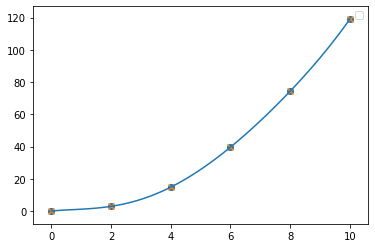

In [63]:
plot(x, y)

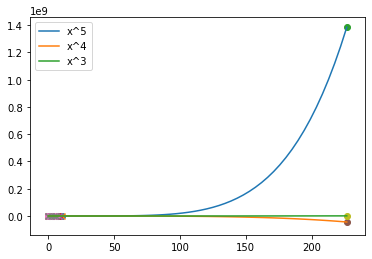

In [64]:
# Se chamarmos a função mais de uma vez podemos
# sobrepor mais de um polinômio sobre o mesmo gráfico.
plot(x, y, x_hat=[226.8], label='x^5')
plot(x[:-1], y[:-1], x_hat=[226.8], label='x^4')
plot(x[:-2], y[:-2], x_hat=[226.8], label='x^3')